# Perdiction of sales

### Problem Statement
The dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [2]:
#Read files:
path = '/home/henri/Documents/Lighthouse lab/Databases/w3-d3-db/regression_exercise.csv'
data = pd.read_csv(path)

In [3]:
## Matplotlib
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (12,8)

In [4]:
def how_much_missing_data (df):
    """ Functions that takes a pd.DF and returns the total of missing values per columns:
        - count of how many are missing
        - from a scale 1(100%) to 0(0%)
        - dtypes    
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    types = df.dtypes
    # also the scale is from 0 to 1
    missing_data = pd.concat([total, percent,types], axis=1, keys=['Total', 'Percent','dtypes'])
    return missing_data 

In [5]:
how_much_missing_data(data)

,Total,Percent,dtypes
Outlet_Size,2410,0.282764,object
Item_Weight,1463,0.171653,float64
Item_Outlet_Sales,0,0.000000,float64
Outlet_Type,0,0.000000,object
Outlet_Location_Type,0,0.000000,object
Outlet_Establishment_Year,0,0.000000,int64
Outlet_Identifier,0,0.000000,object
Item_MRP,0,0.000000,float64
Item_Type,0,0.000000,object
Item_Visibility,0,0.000000,float64


In [6]:
def unique_df_cols(data):    
    catVariables = data[data.dtypes[~(data.dtypes == 'float') | (data.dtypes == 'int')].index.tolist()]
    numVariables = data[data.dtypes[(data.dtypes == 'float') | (data.dtypes == 'int')].index.tolist()]
    print('Only printing the first 20 unique variables')
    print('Categorical variables','\n')
    for cat in catVariables.columns.tolist():
        print(f'There are {data[cat].nunique()} unique {cat}')
        print(f'{data[cat].unique()[:20]} \n')
    print('Numerical variables','\n')
    for num in numVariables.columns.tolist():
        print(f'There are {data[num].nunique()} unique {num}')
        print(f'{data[num].unique()[:20]} \n')


In [7]:
unique_df_cols(data)

Only printing the first 20 unique variables
Categorical variables 

There are 1559 unique Item_Identifier
['FDA15' 'DRC01' 'FDN15' 'FDX07' 'NCD19' 'FDP36' 'FDO10' 'FDP10' 'FDH17'
 'FDU28' 'FDY07' 'FDA03' 'FDX32' 'FDS46' 'FDF32' 'FDP49' 'NCB42' 'DRI11'
 'FDU02' 'FDN22'] 

There are 5 unique Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

There are 16 unique Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

There are 10 unique Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

There are 9 unique Outlet_Establishment_Year
[1999 2009 1998 1987 1985 2002 2007 1997 2004] 

There are 3 unique Outlet_Size
['Medium' nan 'High' 'Small'] 

There are 3 unique Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2'] 

There are 4 unique Outlet_Type
['Superma

In [8]:
data[['Item_Identifier', 'Item_Weight']] = data[['Item_Identifier', 'Item_Weight']].sort_values(by='Item_Identifier').fillna(method='bfill')

In [9]:
## real cool wa
data['Outlet_Size'] = data['Outlet_Size'].fillna(pd.Series(np.random.choice(['Medium', 'Small', 'High'], 
                                                     p=[0.456895,0.390643,0.152462], 
                                                     size=len(data))))

In [10]:
for i in data.index:
    val = data._get_value(i,'Item_Fat_Content')
    if val in ['low fat','LF']:
        data._set_value( i,'Item_Fat_Content','Low Fat')
    elif val in ['reg']:
        data._set_value( i,'Item_Fat_Content','Regular')

In [11]:
data = data.replace({"Outlet_Size" : {"Small":1,'Medium':2,"High":3},
                     "Outlet_Location_Type" : {"Tier 1":1, "Tier 2":2, "Tier 3":3},
                     "Outlet_Type" : {"Grocery Store":0, "Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3":3}
                     })

In [12]:
data['Outlet_Identifier'] = data.Outlet_Identifier.str.extract('(\d{3})').astype(int)

In [13]:
how_much_missing_data(data)

,Total,Percent,dtypes
Item_Outlet_Sales,0,0.0,float64
Outlet_Type,0,0.0,int64
Outlet_Location_Type,0,0.0,int64
Outlet_Size,0,0.0,int64
Outlet_Establishment_Year,0,0.0,int64
Outlet_Identifier,0,0.0,int64
Item_MRP,0,0.0,float64
Item_Type,0,0.0,object
Item_Visibility,0,0.0,float64
Item_Fat_Content,0,0.0,object


In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,2,1,1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,2,3,2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,2,1,1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,1,3,0,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,13,1987,3,3,1,994.7052


We have covered data preparation and feature engineering two weeks ago. Now, it's time to do some predictive models.

In [15]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [16]:
#encoding fat content (nominal values)
data_dum = pd.concat([data,pd.get_dummies(data.Item_Fat_Content)])
data_dum.shape

(17046, 14)

In [17]:
#encoding item type (nominal values)
data_dum = pd.concat([data_dum,pd.get_dummies(data.Item_Type)])
data_dum.shape

(25569, 30)

In [18]:
#dropping perceived useless data prior one hot encoding
data_reg = data_dum.drop(['Item_Type','Item_Fat_Content','Item_Identifier', 'Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year'], axis=1).fillna(0)

In [19]:
data_reg.Meat.unique()

array([0., 1.])

In [20]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25569 entries, 0 to 8522
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Item_Weight            25569 non-null  float64
 1   Item_Visibility        25569 non-null  float64
 2   Item_MRP               25569 non-null  float64
 3   Item_Outlet_Sales      25569 non-null  float64
 4   Low Fat                25569 non-null  float64
 5   Regular                25569 non-null  float64
 6   Baking Goods           25569 non-null  float64
 7   Breads                 25569 non-null  float64
 8   Breakfast              25569 non-null  float64
 9   Canned                 25569 non-null  float64
 10  Dairy                  25569 non-null  float64
 11  Frozen Foods           25569 non-null  float64
 12  Fruits and Vegetables  25569 non-null  float64
 13  Hard Drinks            25569 non-null  float64
 14  Health and Hygiene     25569 non-null  float64
 15  Hou

In [21]:
#since we have too many columns let's do a PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
datascaled = scaler.fit_transform(data_reg)

In [22]:
df_customer_scaled = pd.DataFrame(datascaled,columns=data_reg.columns.to_list())

In [23]:
df_customer_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.754671,-0.139075,2.683923,2.112305,-0.524533,-0.365003,-0.161252,-0.099569,-0.065732,-0.161379,...,-0.224994,-0.09187,-0.144081,-0.192102,-0.13001,-0.081569,-0.050093,-0.221907,-0.133087,-0.076302
1,0.245498,-0.064144,0.016828,-0.199201,-0.524533,-0.365003,-0.161252,-0.099569,-0.065732,-0.161379,...,-0.224994,-0.09187,-0.144081,-0.192102,-0.13001,-0.081569,-0.050093,-0.221907,-0.133087,-0.076302
2,1.989943,-0.122544,1.252166,0.962162,-0.524533,-0.365003,-0.161252,-0.099569,-0.065732,-0.161379,...,-0.224994,-0.09187,-0.144081,-0.192102,-0.13001,-0.081569,-0.050093,-0.221907,-0.133087,-0.076302
3,2.246036,-0.511241,1.787822,0.003710,-0.524533,-0.365003,-0.161252,-0.099569,-0.065732,-0.161379,...,-0.224994,-0.09187,-0.144081,-0.192102,-0.13001,-0.081569,-0.050093,-0.221907,-0.133087,-0.076302
4,0.698933,-0.511241,0.090833,0.187920,-0.524533,-0.365003,-0.161252,-0.099569,-0.065732,-0.161379,...,-0.224994,-0.09187,-0.144081,-0.192102,-0.13001,-0.081569,-0.050093,-0.221907,-0.133087,-0.076302


In [24]:
df_customer_scaled.Regular.unique()

array([-0.36500269,  2.73970583])

In [25]:
pca = PCA(n_components=13)

In [26]:
components = pca.fit_transform(df_customer_scaled)

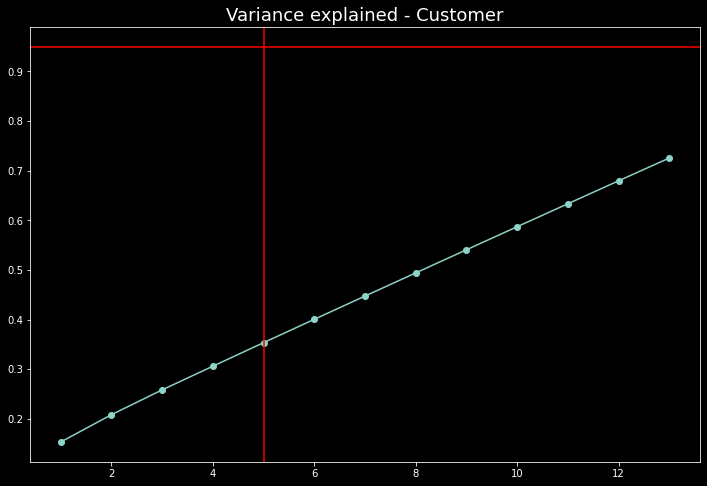

In [27]:
# Calculates the proportion of variance explained
var_exp_cust = np.cumsum(pca.explained_variance_ratio_)

# Plots the elbow plot for the wine pca
plt.plot(range(1,14), var_exp_cust, marker='o')
plt.title("Variance explained - Customer", fontsize=18);
plt.axhline(0.95,c='r')
plt.axvline(5,c='r')
plt.show()

## Model Building

## Task
Make a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, predict the sales as the overall average sales or just zero.
Making baseline models helps in setting a benchmark. If your predictive algorithm is below this, there is something going seriously wrong and you should check your data.

In [28]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

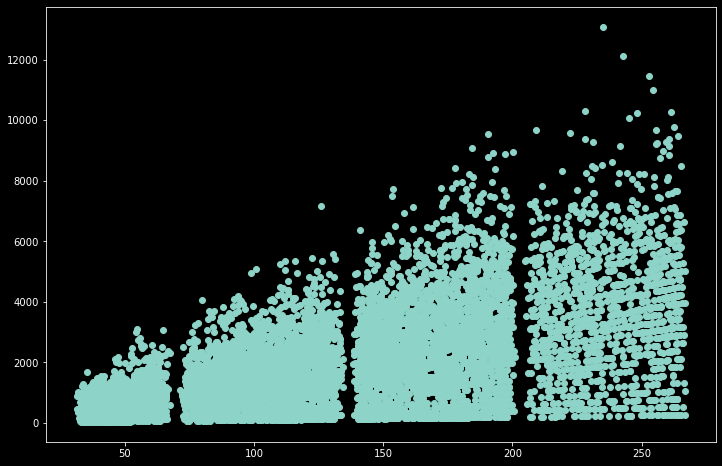

In [29]:
X = data['Item_MRP']
y = data['Item_Outlet_Sales']
plt.scatter(X,y)
plt.show()

In [30]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.743
Method:                 Least Squares   F-statistic:                          2.459e+04
Date:                Mon, 12 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:36:50   Log-Likelihood:                         -73866.
No. Observations:                8523   AIC:                                  1.477e+05
Df Residuals:                    8522   BIC:                                  1.477e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Task
Split your data in 80% train set and 20% test set.

In [31]:
X = data_reg.drop(['Item_Outlet_Sales'], axis=1)
y = data_reg['Item_Outlet_Sales'].values.reshape(-1,1)
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
train_size=0.80,test_size=0.20, random_state=101)

## Task
Use grid_search to find the best value of parameter `alpha` for Ridge and Lasso regressions from `sklearn`.

## Ridge regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg,X_train,y_train,cv=5)

In [34]:
mean_MSE = np.mean(MSEs)
mean_MSE

0.6835078133395103

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [60]:
ridge = Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,100,250,500]}

In [61]:
ridge_regression = GridSearchCV(ridge,parameters)

In [62]:
ridge_regression.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 100, 250, 500]})

In [63]:
ridge_regression.best_params_

{'alpha': 1e-15}

In [64]:
ridge_regression.best_score_

0.6835078133395046

## Lasso regression

In [41]:
from sklearn.linear_model import Lasso

In [55]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,100,250,500,1000]}
lasso = Lasso()

In [56]:
lasso_regression = GridSearchCV(lasso,parameters)
lasso_regression.fit(X_train,y_train)

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5095081022.590756, tolerance: 3285743.028998429
  model = cd_fast.enet_coordinate_descent(
/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5186207302.05737, tolerance: 3283193.7883527256
  model = cd_fast.enet_coordinate_descent(
/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5235276958.77319, tolerance: 3273968.332077835
  model = cd_fast.enet_coordinate_descent(
/home

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 100, 250, 500, 1000]})

In [57]:
lasso_regression.best_params_

{'alpha': 1e-15}

In [58]:
lasso_regression.best_score_

0.6835078133395082

## Task
Using the model from grid_search, predict the values in the test set and compare against the benchmark.

## Ridge

In [46]:
from sklearn.metrics import mean_squared_error

In [65]:
parameters = {'alpha':1e-15}
y_pred = ridge_regression.predict(X_test)
y_pred

array([[6.91784408e-11],
       [1.14653176e-10],
       [9.05431040e+02],
       ...,
       [3.64547915e+03],
       [1.83844996e+03],
       [3.49265953e+03]])

In [66]:
mean_squared_error(y_test,y_pred)

662213.5754844059

In [67]:
ridge_regression.best_params_

{'alpha': 1e-15}

In [68]:
ridge_regression.best_score_

0.6835078133395046

## Lasso

In [72]:
{'alpha': 1e-15}
y_pred = lasso_regression.predict(X_test)

In [73]:
mean_squared_error(y_test,y_pred)

662207.9961237747

In [69]:

lasso_regression.fit(X_test,y_pred)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 100, 250, 500, 1000]})

In [70]:
lasso_regression.best_params_

{'alpha': 1e-15}

In [71]:
lasso_regression.best_score_

0.9999997687706303